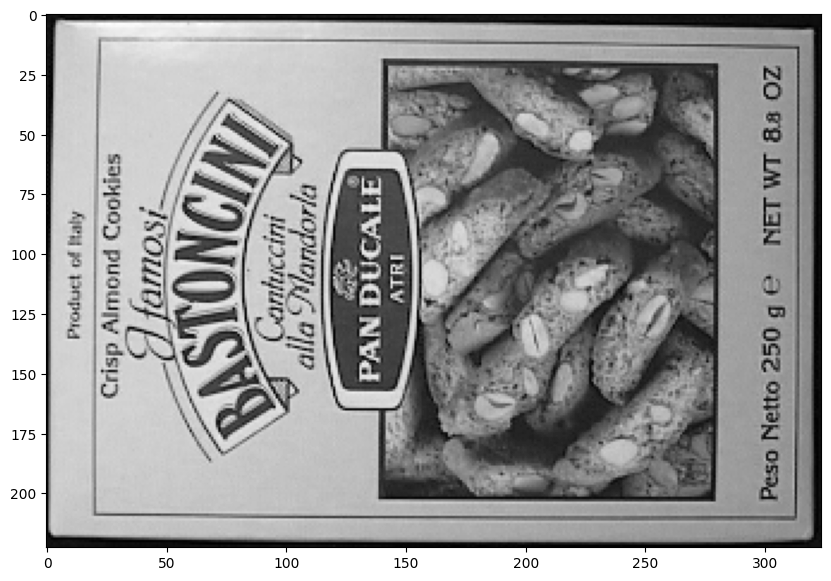

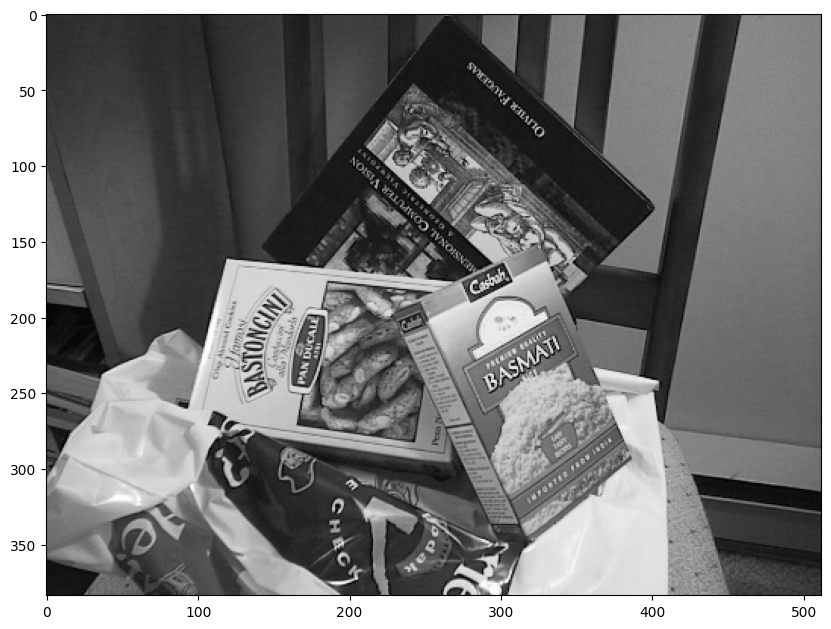

In [208]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens
img1 = cv2.imread('box.png',0)
img2 = cv2.imread('box_in_scene.png',0)

#template
plt.figure(figsize = (10,10))
plt.imshow(img1, cmap="gray")
plt.show()

# Imagem espaço de busca
plt.figure(figsize = (10,10))
plt.imshow(img2, cmap="gray")
plt.show()

In [209]:
# inicializa com o construtor ORB
orb = cv2.ORB_create()

In [210]:
# Detecta os keypoints
#kp = orb.detect(img1,None)
# Computa os Descritores
#orb_tuple = orb.compute(img1, kp)

#Podemos usar uma função que calcula os keypoints e Descritores
kp1, des1 = orb.detectAndCompute(img1,None)

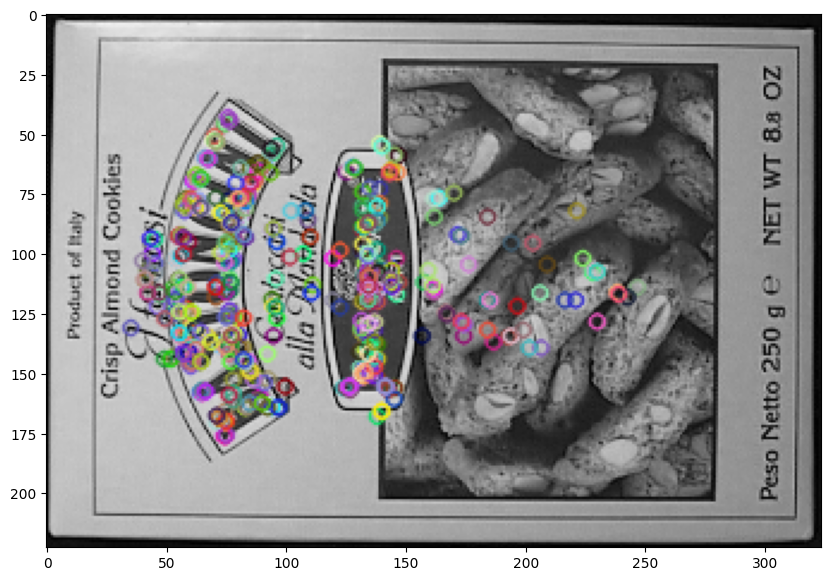

In [211]:
# Desenha os keypoints na imagem
gray2 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=0)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(gray2, cv2.COLOR_BGR2RGB))

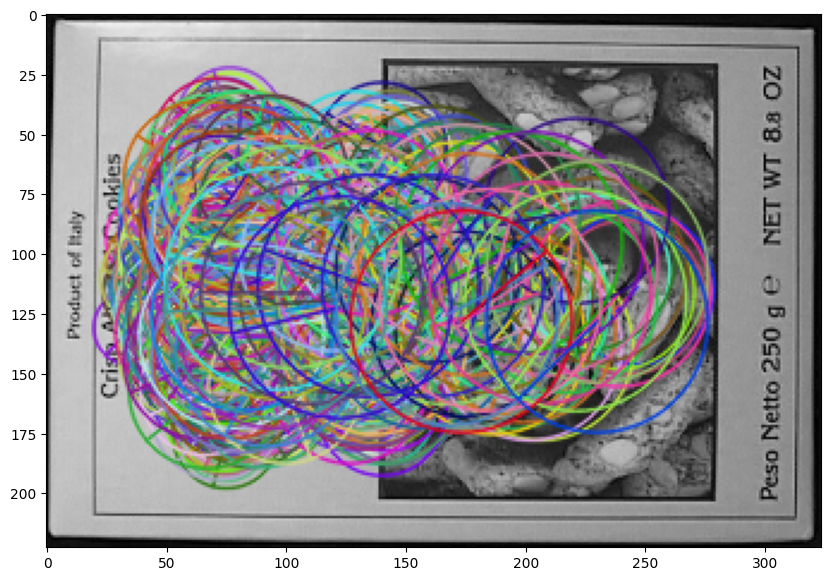

In [212]:
# Os keypoints são formados dos gradientes da imagem naquele ponto, por essa razão possuem amplitude e direção
gray3 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(gray3, cv2.COLOR_BGR2RGB))

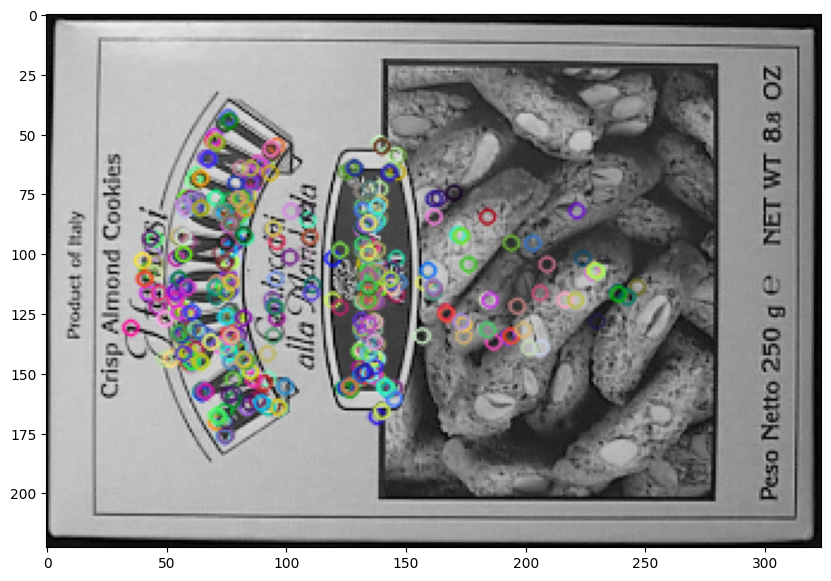

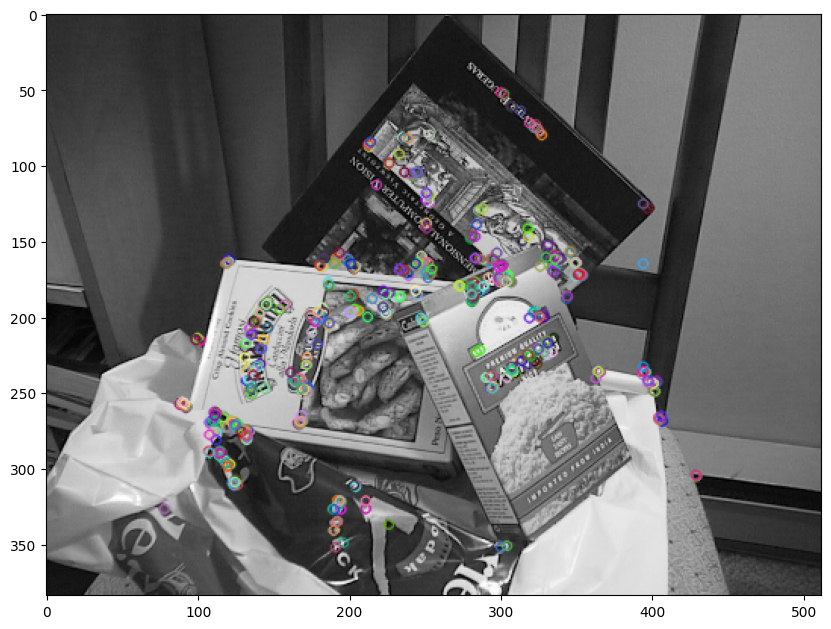

In [213]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens
img1 = cv2.imread('box.png',0)
img2 = cv2.imread('box_in_scene.png',0)

# inicializa com o construtor ORB
orb = cv2.ORB_create()

#Podemos usar uma função que calcula os keypoints e Descritores
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


gray1 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=0)
gray2 = cv2.drawKeypoints(img2, kp2, outImage=np.array([]), flags=0)


#template
plt.figure(figsize = (10,10))
plt.imshow(gray1); plt.show();

# Imagem espaço de busca
plt.figure(figsize = (10,10))
plt.imshow(gray2); plt.show();

Foram encontrados: 148 matches


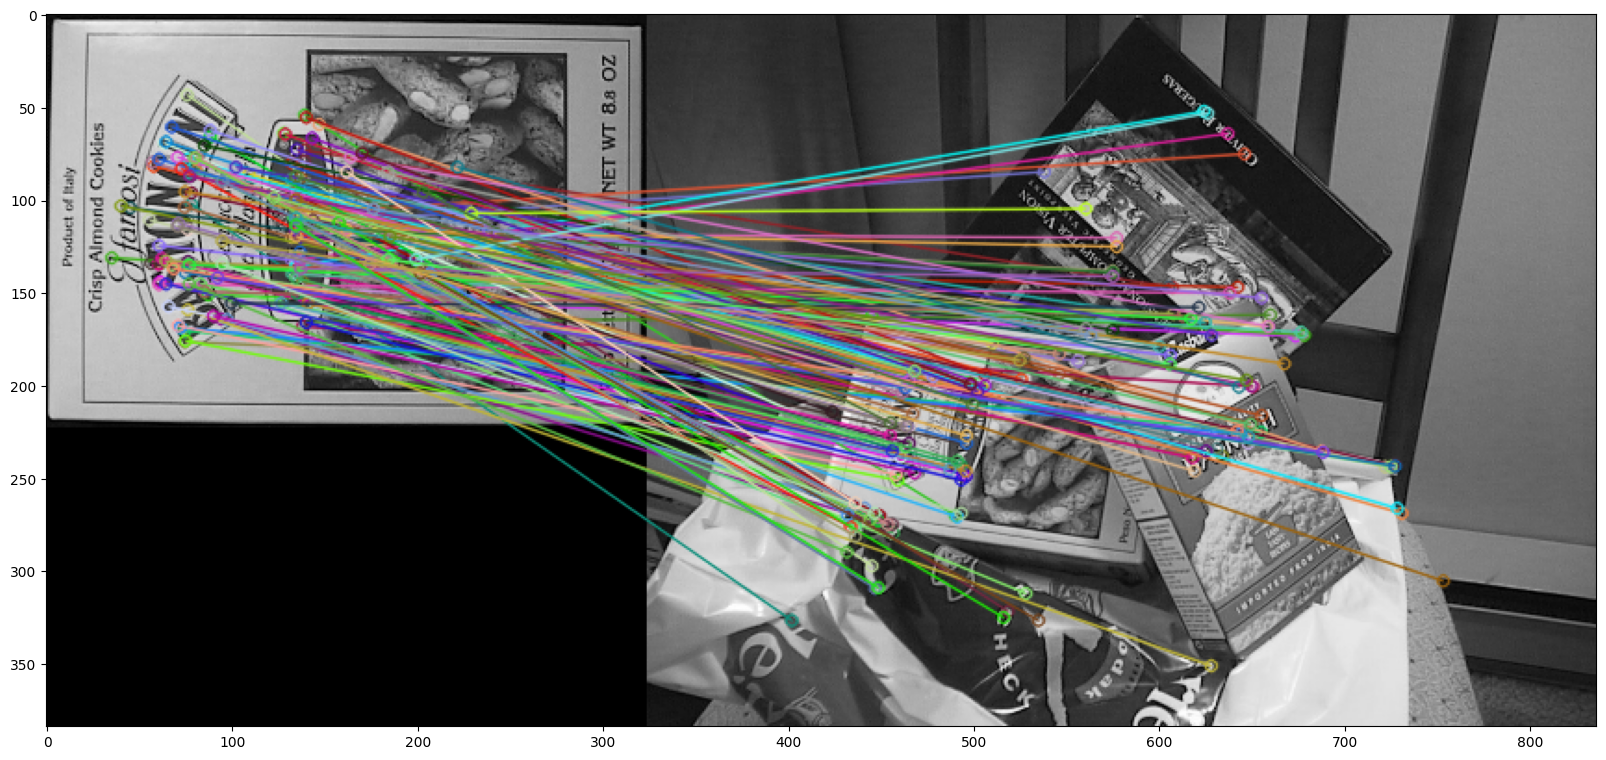

In [214]:
# cria o objeto bf (best featuare)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# a função match devolve os matches encontrados
matches = bf.match(des1,des2)

print("Foram encontrados: {} matches".format(len(matches)))

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)

plt.figure(figsize = (20,10))
plt.imshow(img3); plt.show();

In [215]:
# ordenamos o vetor matches para ficar os melhores (menor distancia) no inicio da lista

matches = sorted(matches, key = lambda x:x.distance)

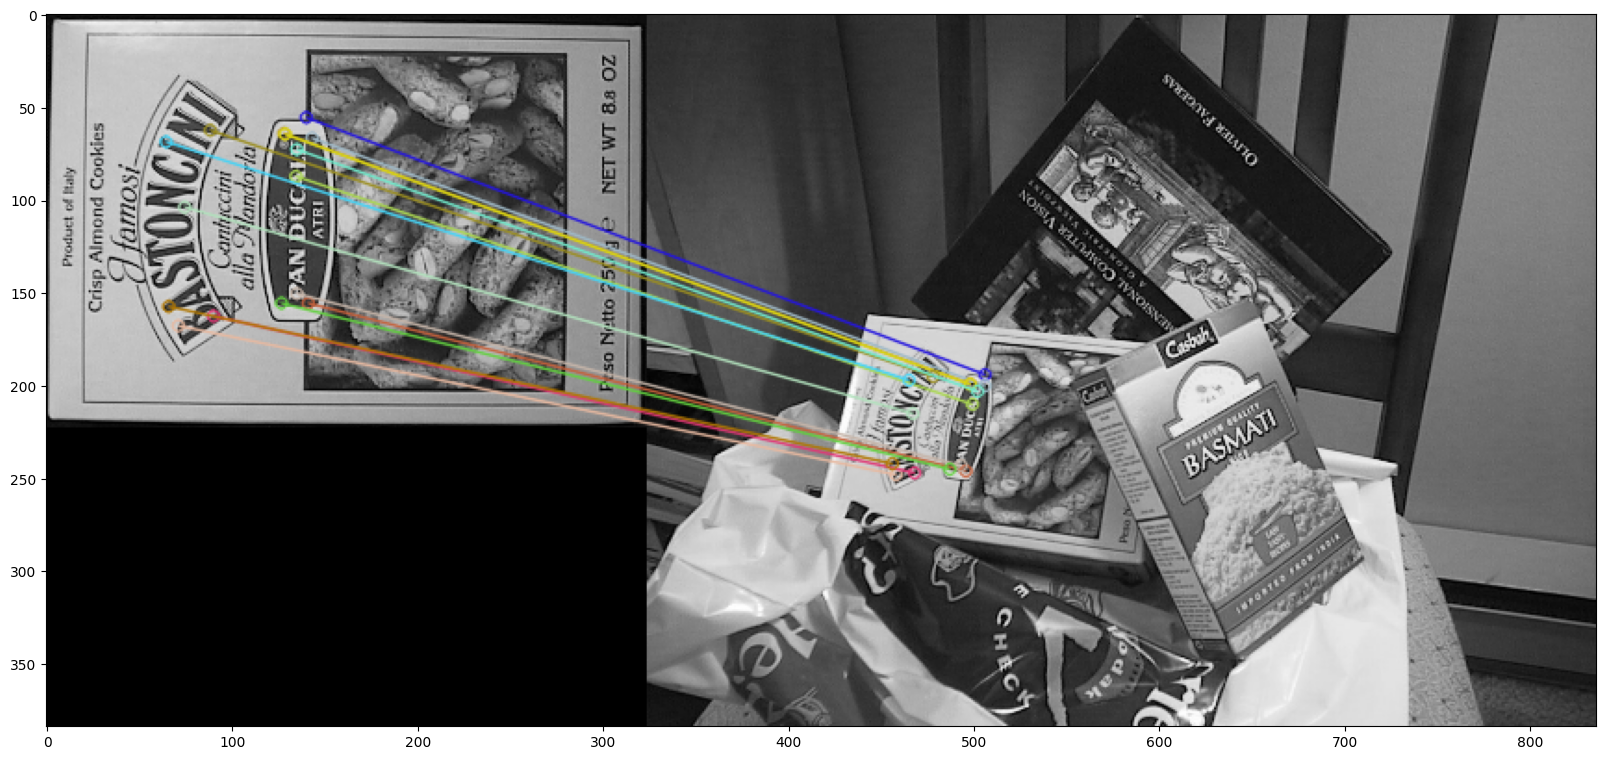

In [216]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:15],None, flags=2)


plt.figure(figsize = (20,10))
plt.imshow(img3); plt.show();

Foram encontrados: 148 matches


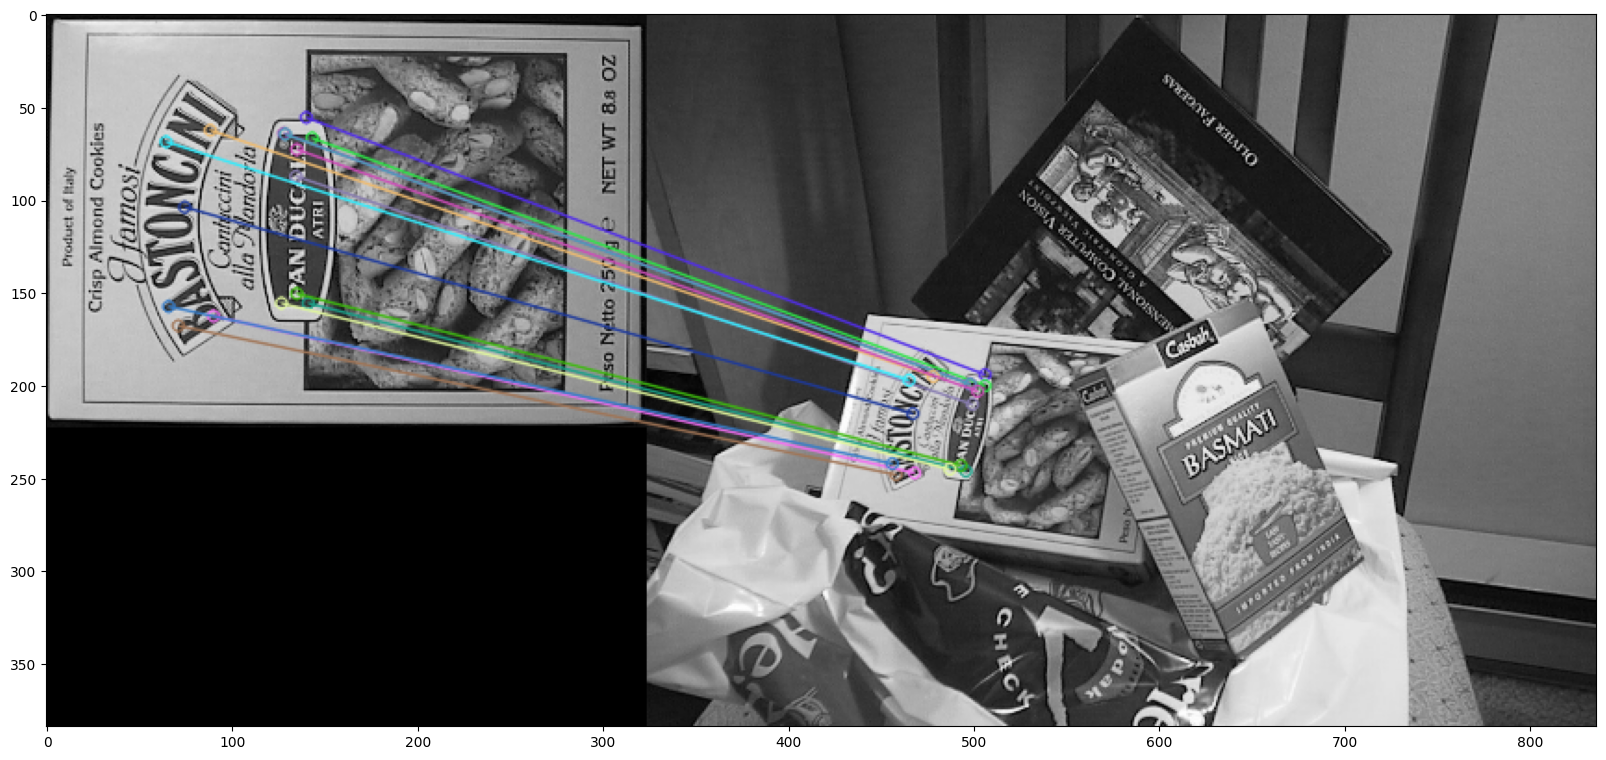

In [217]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens
img1 = cv2.imread('box.png',0)
img2 = cv2.imread('box_in_scene.png',0)

# inicializa com o construtor ORB
orb = cv2.ORB_create()

#Podemos usar uma função que calcula os keypoints e Descritores
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


gray1 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=0)
gray2 = cv2.drawKeypoints(img2, kp2, outImage=np.array([]), flags=0)

# cria o objeto bf (best featuare)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# a função match devolve os matches encontrados
matches = bf.match(des1,des2)

print("Foram encontrados: {} matches".format(len(matches)))

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)

matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:15],None, flags=2)


plt.figure(figsize = (20,10))
plt.imshow(img3)
plt.show()